In [1]:
from typing import List
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def extract_one_spec(dir_path: str) -> List[float]:
    bp_file = open(F'{dir_path}/bp.stat.0.out')
    mem_file = open(F'{dir_path}/memory.stat.0.out')
    f_lines = bp_file.readlines()
    m_lines = mem_file.readlines()
    ipc = float(f_lines[4].split()[-1])
    bp = float(f_lines[22].split()[2].replace('%', ''))
    icms = float(m_lines[6].split()[2][:-1])
    dcms = float(m_lines[31].split()[2][:-1])
    return [ipc, bp, icms, dcms]

In [107]:
def plot_one_parameter(config_normal, config_modified, y_name, figure_name):
    specs = [d.split('.')[1] for d in normal_dirs] + ['Average']
    x = np.arange(len(specs))
    width = 0.3
    fig, ax = plt.subplots()
    plt.ylim((0, max(config_normal) + 1))
    rects1 = ax.bar(x - width/2, config_normal, width, label='Normal', in_layout=False)
    rects2 = ax.bar(x + width/2, config_modified, width, label='Modified', in_layout=False)
    ax.set_ylabel(y_name)
    ax.set_title(figure_name)
    ax.set_xticks(x, specs)
    ax.legend(loc='upper right')
    fig.autofmt_xdate()
    plt.subplots_adjust(bottom=0.2)
    plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
    plt.savefig(F'{image_path}{figure_name}', dpi=200)

In [108]:
normal_path = '/home/veteran/Computer-Architecture-Lab-CSE220/lab2/normal_stat_files/'
modified_path = '/home/veteran/Computer-Architecture-Lab-CSE220/lab2/modified_stat_files/'
image_path = '/home/veteran/Computer-Architecture-Lab-CSE220/lab2/images/'
normal_dirs = sorted(os.listdir(normal_path))
modified_dirs = sorted(os.listdir(modified_path))

In [109]:
IPC = []
BP_MISPRED = []
ICACHE_MISS = []
DCACHE_MISS = []
IPC_M = []
BP_MISPRED_M = []
ICACHE_MISS_M = []
DCACHE_MISS_M = []

In [110]:
for i in range(0, len(normal_dirs)):
    ipc, bpm, ims, dms = extract_one_spec(normal_path + normal_dirs[i])
    ipc_m, bpm_m, ims_m, dms_m = extract_one_spec(modified_path + modified_dirs[i])
    IPC.append(ipc)
    BP_MISPRED.append(bpm)
    ICACHE_MISS.append(ims)
    DCACHE_MISS.append(dms)
    IPC_M.append(ipc_m)
    BP_MISPRED_M.append(bpm_m)
    ICACHE_MISS_M.append(ims_m)
    DCACHE_MISS_M.append(dms_m)

In [111]:
IPC.append(sum(IPC) / len(IPC))
IPC_M.append(sum(IPC_M) / len(IPC_M))
BP_MISPRED.append(sum(BP_MISPRED) / len(BP_MISPRED))
BP_MISPRED_M.append(sum(BP_MISPRED_M) / len(BP_MISPRED_M))
ICACHE_MISS.append(sum(ICACHE_MISS) / len(ICACHE_MISS))
ICACHE_MISS_M.append(sum(ICACHE_MISS_M) / len(ICACHE_MISS_M))
DCACHE_MISS.append(sum(DCACHE_MISS) / len(DCACHE_MISS))
DCACHE_MISS_M.append(sum(DCACHE_MISS_M) / len(DCACHE_MISS_M))

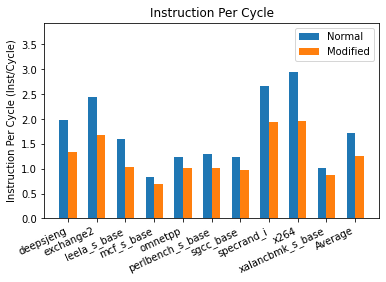

In [112]:
plot_one_parameter(IPC, IPC_M, 'Instruction Per Cycle (Inst/Cycle)', 'Instruction Per Cycle')

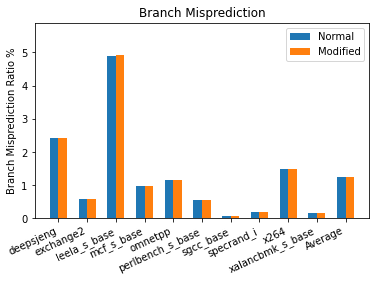

In [113]:
plot_one_parameter(BP_MISPRED, BP_MISPRED_M, 'Branch Misprediction Ratio %', 'Branch Misprediction')

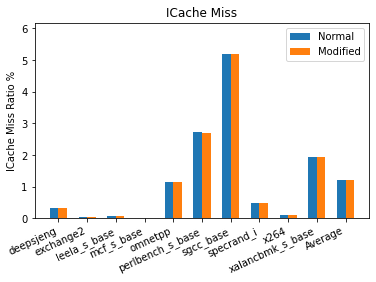

In [114]:
plot_one_parameter(ICACHE_MISS, ICACHE_MISS_M, 'ICache Miss Ratio %', 'ICache Miss')

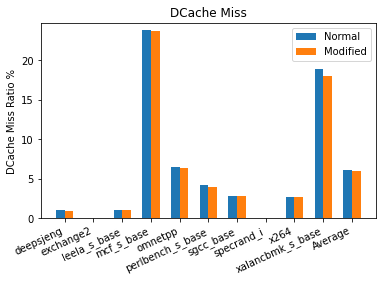

In [115]:
plot_one_parameter(DCACHE_MISS, DCACHE_MISS_M, 'DCache Miss Ratio %', 'DCache Miss')